[*********************100%%**********************]  5 of 5 completed

Nodes: ['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'TSLA']
Edges: [('AAPL', 'AAPL'), ('AAPL', 'AMZN'), ('AAPL', 'GOOGL'), ('AAPL', 'MSFT'), ('AAPL', 'TSLA'), ('AMZN', 'AMZN'), ('AMZN', 'GOOGL'), ('AMZN', 'MSFT'), ('AMZN', 'TSLA'), ('GOOGL', 'GOOGL'), ('GOOGL', 'MSFT'), ('GOOGL', 'TSLA'), ('MSFT', 'MSFT'), ('MSFT', 'TSLA'), ('TSLA', 'TSLA')]

Degree Centrality: {'AAPL': 1.5, 'AMZN': 1.5, 'GOOGL': 1.5, 'MSFT': 1.5, 'TSLA': 1.5}
Betweenness Centrality: {'AAPL': 0.0, 'AMZN': 0.0, 'GOOGL': 0.0, 'MSFT': 0.0, 'TSLA': 0.0}
Closeness Centrality: {'AAPL': 1.0, 'AMZN': 1.0, 'GOOGL': 1.0, 'MSFT': 1.0, 'TSLA': 1.0}
Clustering Coefficient: {'AAPL': 1.0, 'AMZN': 1.0, 'GOOGL': 1.0, 'MSFT': 1.0, 'TSLA': 1.0}


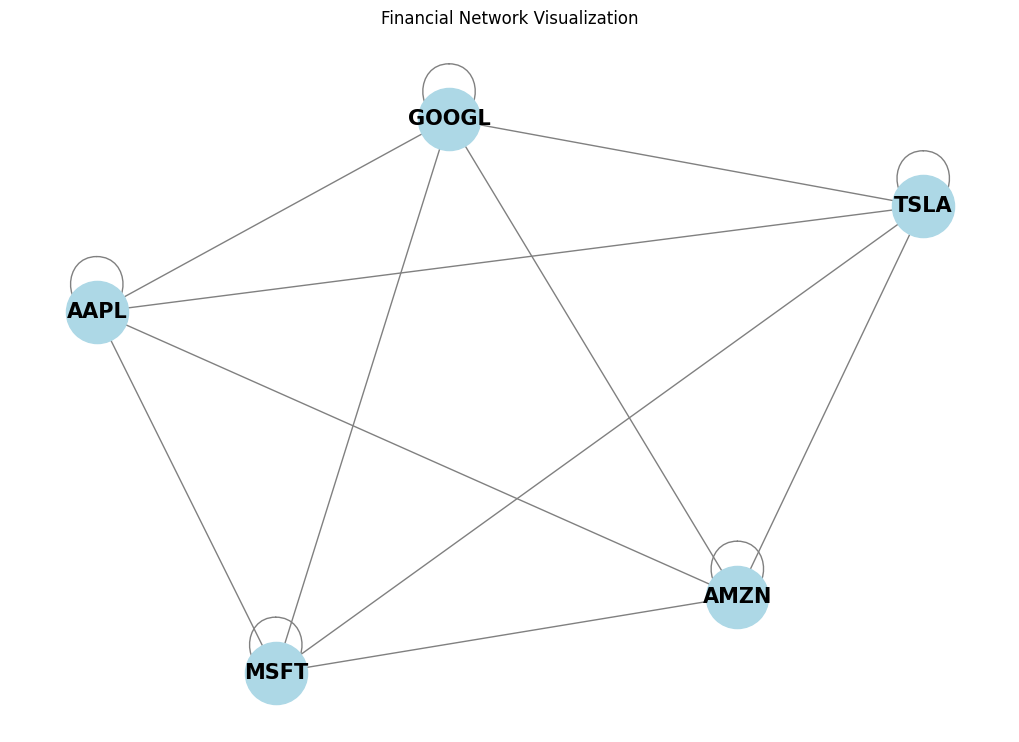


Impact of removing nodes:
Removing AAPL affects 1 component(s)
Removing AMZN affects 1 component(s)
Removing GOOGL affects 1 component(s)
Removing MSFT affects 1 component(s)
Removing TSLA affects 1 component(s)

Network Robustness: 1.0

Liquidity Metrics:
Degree Centrality: {'AAPL': 1.5, 'MSFT': 1.5, 'GOOGL': 1.5, 'AMZN': 1.5, 'TSLA': 1.5}
Betweenness Centrality: {'AAPL': 0.0, 'MSFT': 0.0, 'GOOGL': 0.0, 'AMZN': 0.0, 'TSLA': 0.0}
Closeness Centrality: {'AAPL': 1.0, 'MSFT': 1.0, 'GOOGL': 1.0, 'AMZN': 1.0, 'TSLA': 1.0}
Clustering Coefficient: {'AAPL': 1.0, 'MSFT': 1.0, 'GOOGL': 1.0, 'AMZN': 1.0, 'TSLA': 1.0}


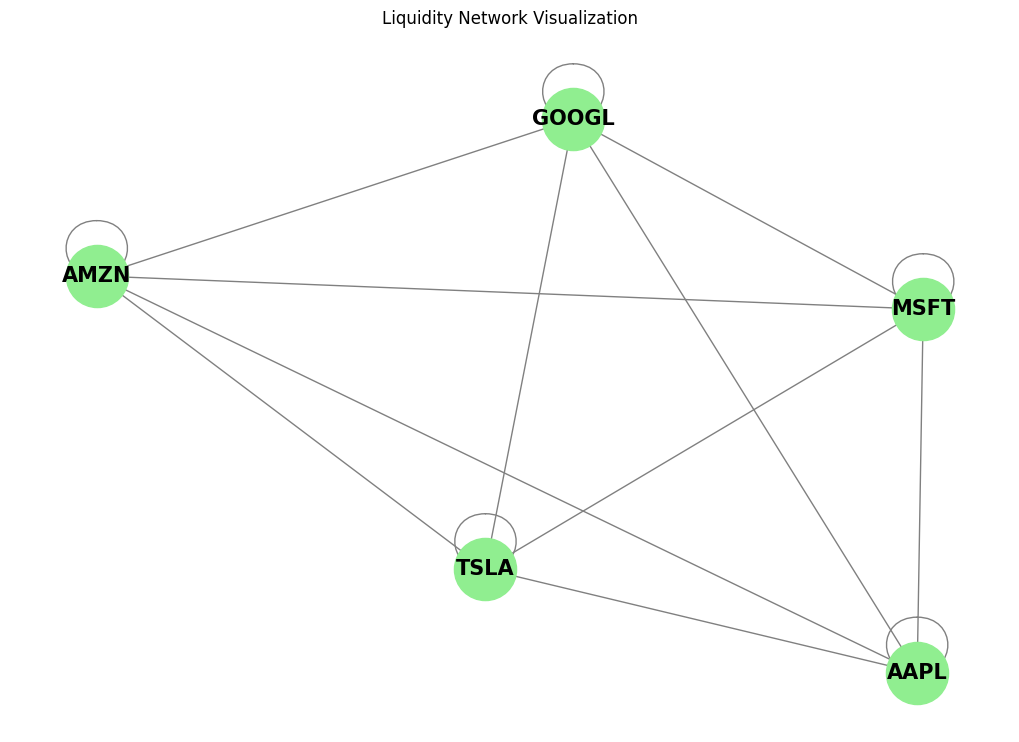

In [1]:
import yfinance as yf
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Define the list of stock tickers
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Fetch historical stock price data
data = yf.download(tickers, start='2023-01-01', end='2024-01-01')['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate correlation matrix
correlation_matrix = returns.corr()

# Create a graph from the correlation matrix
G = nx.from_pandas_adjacency(correlation_matrix, create_using=nx.Graph)

# Basic Graph Information
print("Nodes:", G.nodes())
print("Edges:", G.edges())

# Compute basic metrics
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
clustering_coefficient = nx.clustering(G)

# Print metrics
print("\nDegree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Closeness Centrality:", closeness_centrality)
print("Clustering Coefficient:", clustering_coefficient)

# Visualize the network
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 7))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=15, font_weight='bold', edge_color='gray')
plt.title("Financial Network Visualization")
plt.show()

# Analyze systemic risk - example with node removal
def analyze_impact(G, node):
    H = G.copy()
    H.remove_node(node)
    # Count connected components in the remaining graph
    if len(H.nodes()) == 0:
        return 0
    return len(list(nx.connected_components(H)))

print("\nImpact of removing nodes:")
for node in G.nodes():
    impact = analyze_impact(G, node)
    print(f"Removing {node} affects {impact} component(s)")

# Example of systemic risk calculation: network robustness
def network_robustness(G):
    largest_component_size = max(len(c) for c in nx.connected_components(G))
    return largest_component_size / len(G.nodes())

print("\nNetwork Robustness:", network_robustness(G))

# Calculate liquidity metrics
# For simplicity, we'll use the inverse of the average bid-ask spread as a proxy for liquidity.
# Since we don't have actual bid-ask data here, we assume the following:
bid_ask_spread = pd.DataFrame(index=tickers, columns=tickers, data=np.random.uniform(0.01, 0.05, size=(len(tickers), len(tickers))))

# Convert to a graph where edges represent liquidity
G_liquidity = nx.from_pandas_adjacency(bid_ask_spread, create_using=nx.Graph)

# Compute basic metrics for the liquidity graph
degree_centrality_liquidity = nx.degree_centrality(G_liquidity)
betweenness_centrality_liquidity = nx.betweenness_centrality(G_liquidity)
closeness_centrality_liquidity = nx.closeness_centrality(G_liquidity)
clustering_coefficient_liquidity = nx.clustering(G_liquidity)

# Print liquidity metrics
print("\nLiquidity Metrics:")
print("Degree Centrality:", degree_centrality_liquidity)
print("Betweenness Centrality:", betweenness_centrality_liquidity)
print("Closeness Centrality:", closeness_centrality_liquidity)
print("Clustering Coefficient:", clustering_coefficient_liquidity)

# Visualize the liquidity network
pos_liquidity = nx.spring_layout(G_liquidity)
plt.figure(figsize=(10, 7))
nx.draw(G_liquidity, pos_liquidity, with_labels=True, node_size=2000, node_color='lightgreen', font_size=15, font_weight='bold', edge_color='gray')
plt.title("Liquidity Network Visualization")
plt.show()
